In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris['data'][:,(2, 3)]
y = (iris['target'] == 2).astype(np.float64)   #將y分成class0與class1

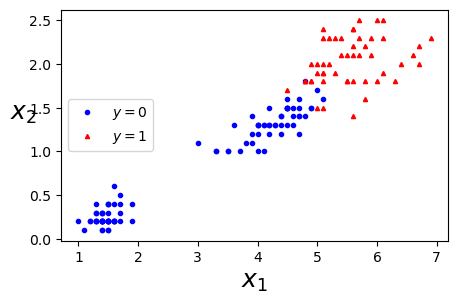

In [3]:
plt.figure(figsize=(5,3))
plt.plot(x[y==0, 0], x[y==0, 1], 'bo', markersize=3, label='$y=0$')
plt.plot(x[y==1, 0], x[y==1, 1], 'r^', markersize=3, label='$y=1$')
plt.legend(loc='center left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', rotation=0, fontsize=18)
plt.show()

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svmClf = Pipeline([
    ('scal', StandardScaler()),
    ('linSvc', LinearSVC(dual='auto' ,C=1, loss='hinge', random_state=1))
])     #由於版本更新,在參數加上dual='auto',可避免錯誤

svmClf.fit(x, y)
svmClf['linSvc'].intercept_, svmClf['linSvc'].coef_

(array([-2.5053212]), array([[1.63336059, 2.38799535]]))

In [9]:
svmClf.score(x, y)

0.96

In [11]:
svmClf.predict([[5.5,1.7]])

array([1.])

In [20]:
def plotPredictions(model, x, y):
    x1s = np.linspace(x.min(axis=0)[0]-0.05, x.max(axis=0)[0]+0.05, 1000)
    x2s = np.linspace(x.min(axis=0)[1]-0.05, x.max(axis=0)[1]+0.05, 1000)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    
    yPred = model.predict(xNew).reshape(x1.shape)
    plt.contourf(x1, x2, yPred, cmap=plt.cm.brg, alpha=0.2)
    
    yDecision = model.decision_function(xNew).reshape(x1.shape)
    plt.contour(x1, x2, yDecision, colors='k', levels=[-1, 0, 1], linestyles=['--','-','--'], alpha=0.8)
    
    plt.plot(x[y==0, 0], x[y==0, 1], 'bo', markersize=3, label='$y=0$')
    plt.plot(x[y==1, 0], x[y==1, 1], 'r^', markersize=3, label='$y=1$')
    
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18, rotation=0)

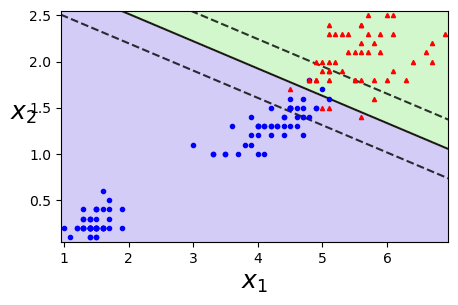

In [21]:
plt.figure(figsize=(5, 3))
plotPredictions(svmClf, x, y)
plt.show()

In [22]:
from sklearn.svm import SVC

svcClf = Pipeline([
    ('scal', StandardScaler()),
    ('linSvc', SVC(kernel='linear', C=1, random_state=1))
])

svcClf.fit(x, y)
svcClf['linSvc'].intercept_, svcClf['linSvc'].coef_

(array([-2.84959514]), array([[2.09352075, 2.44252199]]))

In [23]:
svcClf.score(x, y)

0.9533333333333334

In [24]:
svcClf.predict([[5.5, 1.7]])

array([1.])

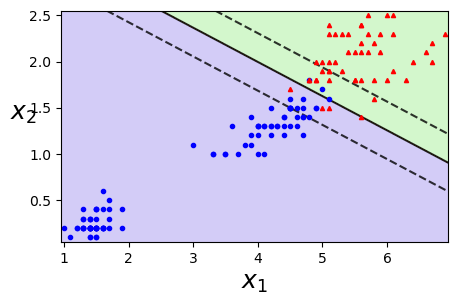

In [25]:
plt.figure(figsize=(5,3))
plotPredictions(svcClf, x, y)
plt.show()

In [27]:
from sklearn.linear_model import SGDClassifier

sgdClf = Pipeline([
    ('scal', StandardScaler()),
    ('linSvc', SGDClassifier(loss='hinge', alpha=1/(1*len(y)), random_state=1))
])

sgdClf.fit(x, y)
sgdClf['linSvc'].intercept_, sgdClf['linSvc'].coef_

(array([-3.41874739]), array([[2.32563254, 2.69470285]]))

In [28]:
sgdClf.score(x, y)

0.9666666666666667

In [29]:
sgdClf.predict([[5.5, 1.7]])

array([1.])

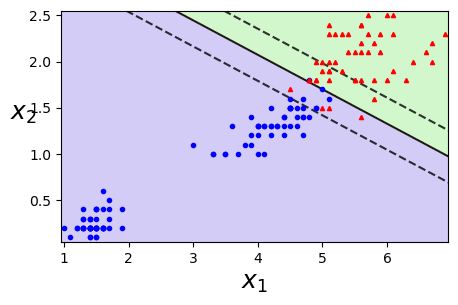

In [31]:
plt.figure(figsize=(5,3))
plotPredictions(sgdClf, x, y)
plt.show()